In [1]:
%matplotlib widget

import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

In [3]:
pixelsX = 1024
pixelsY = 1024

In [4]:
def matrixCreator(raw, pixelsX, pixelsY):
    matrix = []
    for i in range(0, len(raw), pixelsX*pixelsY):
        blank = np.zeros((pixelsX, pixelsY))
        for j in range(0, pixelsX):
            for k in range(0, pixelsY):
                blank[j, k] = raw[k + pixelsX*j + i]
        matrix.append(blank) 
    return matrix

def dataCreator(filename, pixelsX, pixelsY):
    raw_array = np.fromfile(filename, dtype = "float32")
    matrix = matrixCreator(raw_array, pixelsX, pixelsY)
    return matrix

def imageCreator(data, dopple):
    image = []
    mean = 0
    for i in range(0, dopple):
        mean += data[i]
    mean = mean/dopple
    image.append(mean)  
    return image[0]

In [5]:
samples = ["10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
set = "10um_20"

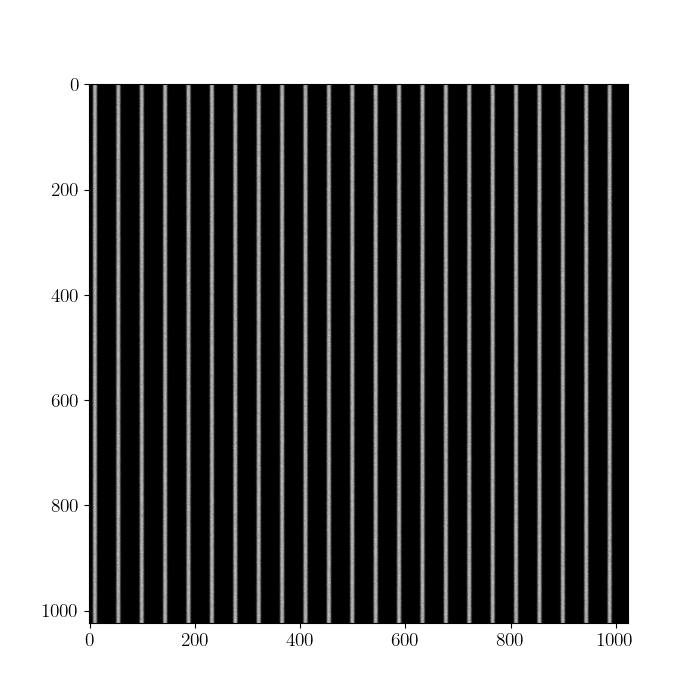

In [6]:
sample = dataCreator("sets/images/{}/{}um.raw".format(set, samples[1]), pixelsX, pixelsY)
image = imageCreator(sample, 2)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image, cmap = "grey")

(array([734.,  14.,  12.,   7.,   5.,   5.,   7.,   4.,   2.,   4.,   3.,
          4.,   3.,   3.,   3.,   2.,   3.,   0.,   3.,   2.,   2.,   2.,
          3.,   3.,   2.,   1.,   3.,   0.,   2.,   2.,   1.,   2.,   4.,
          0.,   2.,   3.,   1.,   2.,   2.,   1.,   3.,   0.,   3.,   1.,
          2.,   1.,   1.,   4.,   1.,   3.,   2.,   2.,   1.,   2.,   2.,
          0.,   3.,   4.,   1.,   3.,   2.,   4.,   1.,   3.,   2.,   2.,
          4.,   4.,   5.,   3.,   2.,   6.,   4.,   7.,   8.,  11.,  16.,
         40.]),
 array([1.0000e+00, 1.0010e+03, 2.0010e+03, 3.0010e+03, 4.0010e+03,
        5.0010e+03, 6.0010e+03, 7.0010e+03, 8.0010e+03, 9.0010e+03,
        1.0001e+04, 1.1001e+04, 1.2001e+04, 1.3001e+04, 1.4001e+04,
        1.5001e+04, 1.6001e+04, 1.7001e+04, 1.8001e+04, 1.9001e+04,
        2.0001e+04, 2.1001e+04, 2.2001e+04, 2.3001e+04, 2.4001e+04,
        2.5001e+04, 2.6001e+04, 2.7001e+04, 2.8001e+04, 2.9001e+04,
        3.0001e+04, 3.1001e+04, 3.2001e+04, 3.3001e+04, 3.

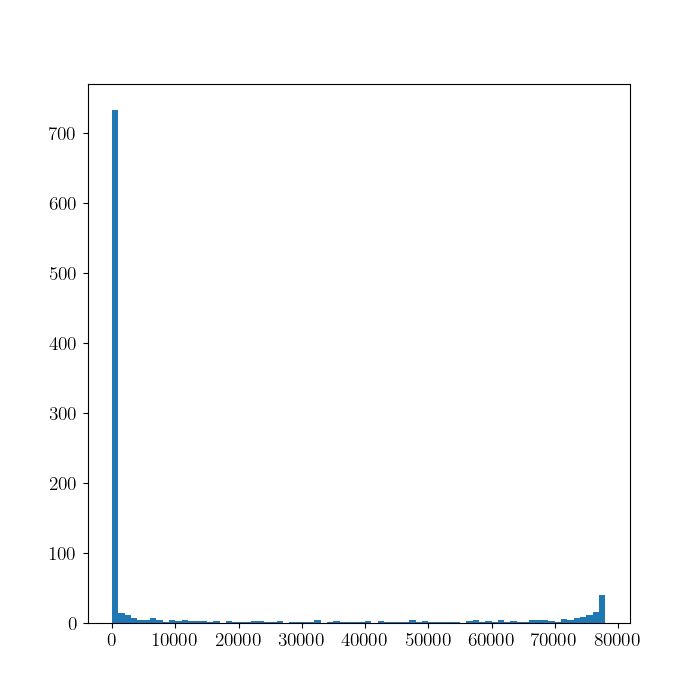

In [20]:
proyection = np.zeros_like(image[0])
for row in image:
    proyection += row

fig, ax = plt.subplots(figsize=(7, 7))
bines = bins = [x for x in range(int(min(proyection)), int(max(proyection)), 1000)]
ax.hist(proyection, bins = bines)

In [16]:
threshold = 10000

for i in range(0, len(proyection)):
    if proyection[i] != 0 and proyection[i] > threshold:
        proyection[i] = 1
    else:
        proyection[i] = 0

In [17]:
countOnes = 0
oneSet = []
countZeros = 0
zeroSet = []

for i in range(0, len(proyection)):
    if proyection[i] == 1:
        countOnes += 1
        try:
            if proyection[i + 1] == 0:
                oneSet.append(countOnes)
                countOnes = 0
        except Exception as e:
            None
    
    if proyection[i] == 0:
        countZeros += 1
        try:
            if proyection[i + 1] == 1:
                zeroSet.append(countZeros)
                countZeros = 0
        except Exception as e:
            None

(array([23.,  0.,  0.,  0.]),
 array([ 9.5, 10.5, 11.5, 12.5, 13.5]),
 <BarContainer object of 4 artists>)

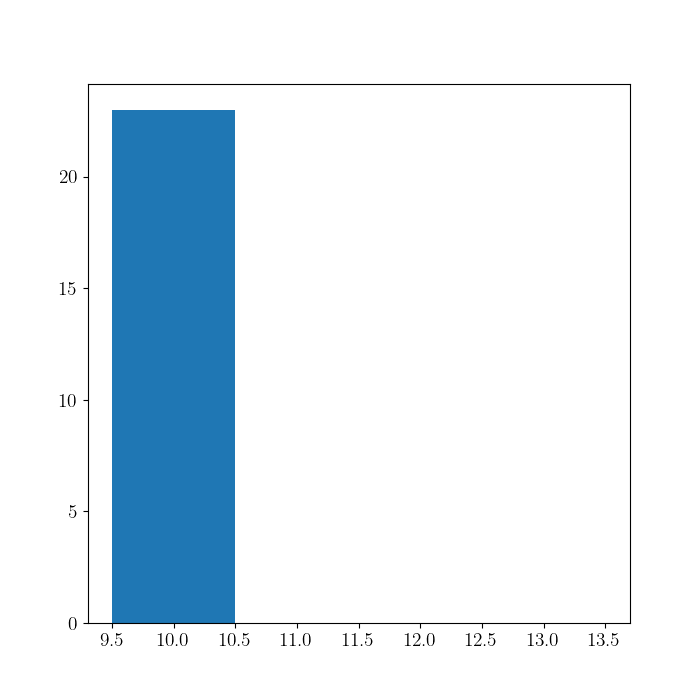

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
bines = bins = [x - 0.5 for x in range(min(oneSet), max(oneSet) + 5)]
ax.hist(oneSet, bins = bines)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1., 20.,  1.,  0.,  0.,  0.]),
 array([ 5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5,
        16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5,
        27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5,
        38.5]),
 <BarContainer object of 33 artists>)

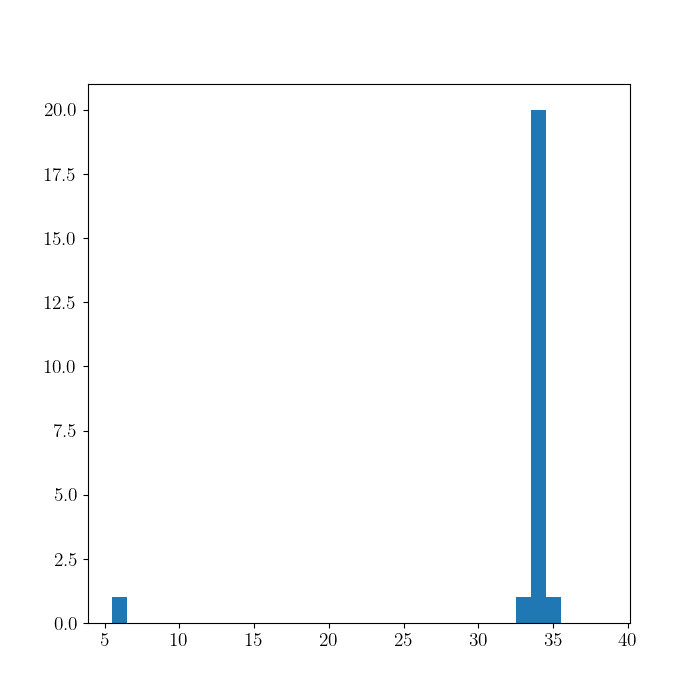

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
bines = bins = [x - 0.5 for x in range(min(zeroSet), max(zeroSet) + 5)]
ax.hist(zeroSet, bins = bines)